In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

In [ ]:
import pandas as pd
import os 
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
gdrive_dir = "gdrive/My Drive/CS3244"
# gdrive_dir = "./"
train_data_dir = os.path.join(gdrive_dir, "datasets/Train")
test_data_dir = os.path.join(gdrive_dir, "datasets/Test")
# train
subject_id_train_filepath = os.path.join(train_data_dir, "subject_id_train.txt")
X_train_filepath = os.path.join(train_data_dir, "X_train.txt")
y_train_filepath = os.path.join(train_data_dir, "y_train.txt")
# test
subject_id_test_filepath = os.path.join(test_data_dir, "subject_id_test.txt")
X_test_filepath = os.path.join(test_data_dir, "X_test.txt")
y_test_filepath = os.path.join(test_data_dir, "y_test.txt")
# features
features_filepath = os.path.join(gdrive_dir, "datasets/features.txt")

In [ ]:
with open(features_filepath, 'r') as tf:
    features = tf.read().split('\n')
features = features[:-1] # remove last newline

# Read train data into pd
subject_id_train = pd.read_csv(subject_id_train_filepath, header=None)
X_train_df = pd.read_csv(X_train_filepath, header=None, delim_whitespace=True)
y_train_df = pd.read_csv(y_train_filepath, header=None)

X_train_df.columns = features
X_train_df.insert(0, 'subject_id', subject_id_train)
X_train_df

subject_id  ...  tZAxisAcc-AngleWRTGravity-1    
0              1  ...                        -0.051718
1              1  ...                        -0.047436
2              1  ...                        -0.042271
3              1  ...                        -0.040826
4              1  ...                        -0.037080
...          ...  ...                              ...
7762          30  ...                         0.056020
7763          30  ...                         0.056252
7764          30  ...                         0.047071
7765          30  ...                         0.031700
7766          30  ...                         0.042981

[7767 rows x 562 columns]

In [ ]:
# Read test data into pd
subject_id_test = pd.read_csv(subject_id_test_filepath, header=None)
X_test_df = pd.read_csv(X_test_filepath, header=None, delim_whitespace=True)
y_test_df = pd.read_csv(y_test_filepath, header=None)


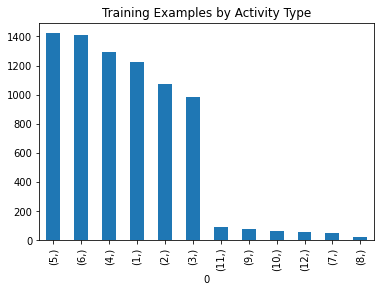

In [ ]:
# histogram visualization of training data
# we know there are 12 labels
y_train_df.value_counts().plot(kind='bar',
                          title='Training Examples by Activity Type')

From the above histogram, we observe that our data is highly imbalanced for labels concerning the transition of one position to the next compared to the labels for the positions. Even amongst the position labels, a small degree of imbalance can be observed; largest between position 3 and position 5.

Resampling may need to be considered.

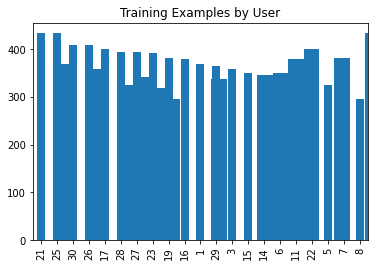

tBodyAcc-Mean-1                  ...  tZAxisAcc-AngleWRTGravity-1    
0                            0.043580  ...                        -0.051718
1                            0.039480  ...                        -0.047436
2                            0.039978  ...                        -0.042271
3                            0.039785  ...                        -0.040826
4                            0.038758  ...                        -0.037080
...                               ...  ...                              ...
6594                         0.052110  ...                         0.368941
6595                         0.027060  ...                         0.376718
6596                         0.010848  ...                         0.387294
6597                         0.037183  ...                         0.406281
6598                         0.048483  ...                         0.408951

[6599 rows x 561 columns]

In [ ]:
# Spliting of data set 
# We should split the data set by users rather than by a percentage
# Only worrying about having at least a few example records per activity is not sufficient (credit https://towardsdatascience.com/human-activity-recognition-har-tutorial-with-keras-and-core-ml-part-1-8c05e365dfa0 )

X_train_df.hist(column="subject_id", bins = subject_id_train.max()[0])
X_train_df['subject_id'].value_counts().plot(kind='bar',
                                  title='Training Examples by User')
plt.show()
# observed from the histogram, we have a decent spread of data among the participants in the training set

X_train = X_train_df[X_train_df['subject_id'] <= 27].drop(columns=['subject_id'])
X_val = X_train_df[X_train_df['subject_id'] > 27].drop(columns=['subject_id'])

X_train

In [ ]:
y_train_df.insert(0, 'subject_id', subject_id_train)
y_train = y_train_df[y_train_df['subject_id'] <= 27]
y_val = y_train_df[y_train_df['subject_id'] > 27]
y_train = y_train.drop(columns=['subject_id'])
y_val = y_val.drop(columns=['subject_id'])
y_train_df = y_train_df.drop(columns=['subject_id'])

In [ ]:
from sklearn import svm 
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import multilabel_confusion_matrix
from sklearn.metrics import accuracy_score , precision_score, recall_score, f1_score

SVM using Linear Kernel

In [ ]:
classifier = svm.SVC(kernel="linear", C=2 ) 
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test_df)

print("Accuracy score:", accuracy_score(y_test_df,y_pred))


print('Micro Precision: {:.2f}'.format(precision_score(y_test_df, y_pred, average='micro')))
print('Micro Recall: {:.2f}'.format(recall_score(y_test_df, y_pred, average='micro')))
print('Micro F1-score: {:.2f}\n'.format(f1_score(y_test_df, y_pred, average='micro')))

print('Macro Precision: {:.2f}'.format(precision_score(y_test_df, y_pred, average='macro')))
print('Macro Recall: {:.2f}'.format(recall_score(y_test_df, y_pred, average='macro')))
print('Macro F1-score: {:.2f}\n'.format(f1_score(y_test_df, y_pred, average='macro')))

print('Weighted Precision: {:.2f}'.format(precision_score(y_test_df, y_pred, average='weighted')))
print('Weighted Recall: {:.2f}'.format(recall_score(y_test_df, y_pred, average='weighted')))
print('Weighted F1-score: {:.2f}'.format(f1_score(y_test_df, y_pred, average='weighted')))

print('\nClassification Report\n')
labels = ['WALKING', 'WALKING_UPSTAIRS', 'WALKING_DOWNSTAIRS','SITTING','STANDING','LAYING','STAND_TO_SIT','SIT_TO_STAND','SIT_TO_LIE','LIE_TO_SIT','STAND_TO_LIE','LIE_TO_STAND']
print(classification_report(y_test_df, y_pred, target_names=labels))


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"


Accuracy score: 0.9452877925363694
Micro Precision: 0.95
Micro Recall: 0.95
Micro F1-score: 0.95

Macro Precision: 0.86
Macro Recall: 0.86
Macro F1-score: 0.86

Weighted Precision: 0.95
Weighted Recall: 0.95
Weighted F1-score: 0.94

Classification Report

                    precision    recall  f1-score   support

           WALKING       0.94      0.99      0.96       496
  WALKING_UPSTAIRS       0.97      0.94      0.96       471
WALKING_DOWNSTAIRS       0.99      0.97      0.98       420
           SITTING       0.95      0.88      0.91       508
          STANDING       0.90      0.96      0.93       556
            LAYING       1.00      1.00      1.00       545
      STAND_TO_SIT       0.95      0.78      0.86        23
      SIT_TO_STAND       0.83      1.00      0.91        10
        SIT_TO_LIE       0.68      0.66      0.67        32
        LIE_TO_SIT       0.69      0.80      0.74        25
      STAND_TO_LIE       0.71      0.73      0.72        49
      LIE_TO_STAND     

Accuracy with Linear SVM - 94.5%, relatively HIGH recall and f1-score

In [ ]:
C_2d_range = [1e-4,1e-3,1e-2,1,1e2,1e3,1e4,1e5,1e6]
scoreList = []
scoreDict = {}

for c in (C_2d_range):
    rbfKernelSVM = svm.SVC(kernel="rbf", gamma="scale", C = c)
    rbfKernelSVM.fit(X_train,y_train)
    accuracyScore = rbfKernelSVM.score(X_test_df,y_test_df)
    scoreDict[c] = accuracyScore
    scoreList.append(accuracyScore)

print("ScoreDict", scoreDict) # Accuracy results with different c hyperparameters


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarnin

ScoreDict {0.0001: 0.17583807716635041, 0.001: 0.17583807716635041, 0.01: 0.5404807084123973, 1: 0.9304237824161923, 100.0: 0.9487666034155597, 1000.0: 0.9497153700189753, 10000.0: 0.9497153700189753, 100000.0: 0.9497153700189753, 1000000.0: 0.9497153700189753}


SVM with RBF - with optimal c parameter(100)

In [ ]:

classifier =svm.SVC(kernel="rbf", gamma="scale", C = 100)
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test_df)

accuracy = classifier.score(X_test_df, y_test_df)
print(accuracy)
print("Accuracy score:", accuracy_score(y_test_df,y_pred))


print('Micro Precision: {:.2f}'.format(precision_score(y_test_df, y_pred, average='micro')))
print('Micro Recall: {:.2f}'.format(recall_score(y_test_df, y_pred, average='micro')))
print('Micro F1-score: {:.2f}\n'.format(f1_score(y_test_df, y_pred, average='micro')))

print('Macro Precision: {:.2f}'.format(precision_score(y_test_df, y_pred, average='macro')))
print('Macro Recall: {:.2f}'.format(recall_score(y_test_df, y_pred, average='macro')))
print('Macro F1-score: {:.2f}\n'.format(f1_score(y_test_df, y_pred, average='macro')))

print('Weighted Precision: {:.2f}'.format(precision_score(y_test_df, y_pred, average='weighted')))
print('Weighted Recall: {:.2f}'.format(recall_score(y_test_df, y_pred, average='weighted')))
print('Weighted F1-score: {:.2f}'.format(f1_score(y_test_df, y_pred, average='weighted')))

print('\nClassification Report\n')
labels = ['WALKING', 'WALKING_UPSTAIRS', 'WALKING_DOWNSTAIRS','SITTING','STANDING','LAYING','STAND_TO_SIT','SIT_TO_STAND','SIT_TO_LIE','LIE_TO_SIT','STAND_TO_LIE','LIE_TO_STAND']
print(classification_report(y_test_df, y_pred, target_names=labels))


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"


0.9487666034155597
Accuracy score: 0.9487666034155597
Micro Precision: 0.95
Micro Recall: 0.95
Micro F1-score: 0.95

Macro Precision: 0.88
Macro Recall: 0.86
Macro F1-score: 0.87

Weighted Precision: 0.95
Weighted Recall: 0.95
Weighted F1-score: 0.95

Classification Report

                    precision    recall  f1-score   support

           WALKING       0.95      0.98      0.97       496
  WALKING_UPSTAIRS       0.95      0.96      0.95       471
WALKING_DOWNSTAIRS       0.99      0.95      0.97       420
           SITTING       0.97      0.89      0.93       508
          STANDING       0.91      0.98      0.94       556
            LAYING       1.00      1.00      1.00       545
      STAND_TO_SIT       1.00      0.78      0.88        23
      SIT_TO_STAND       0.83      1.00      0.91        10
        SIT_TO_LIE       0.69      0.62      0.66        32
        LIE_TO_SIT       0.72      0.84      0.78        25
      STAND_TO_LIE       0.70      0.76      0.73        49
    

Final Accuracy of SVM Kernel
- Linear : 94.5%
- RBF kernel (c = 100): 94.8%






----------------------------------